Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Random Forest Performance:**
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


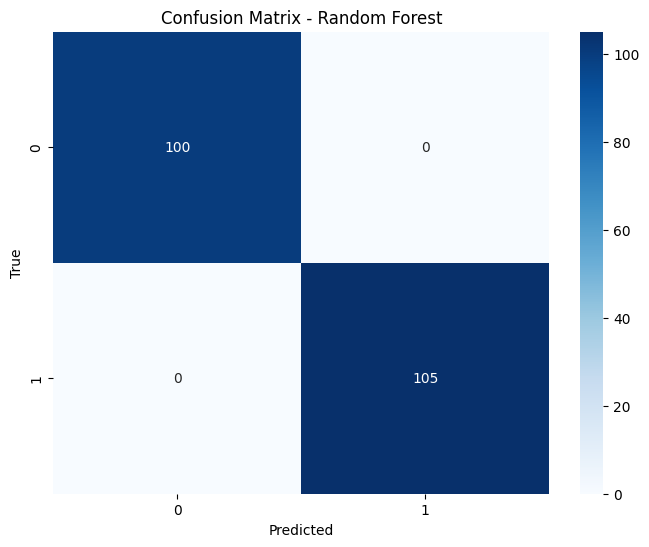


**AdaBoost Performance:**
Accuracy: 0.8829268292682927
Precision: 0.8857142857142857
Recall: 0.8857142857142857
F1-score: 0.8857142857142857


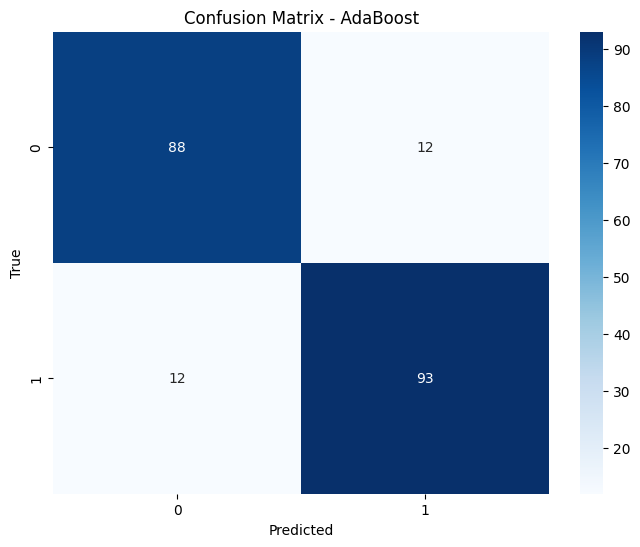


**Decision Tree Performance:**
Accuracy: 0.9853658536585366
Precision: 1.0
Recall: 0.9714285714285714
F1-score: 0.9855072463768115


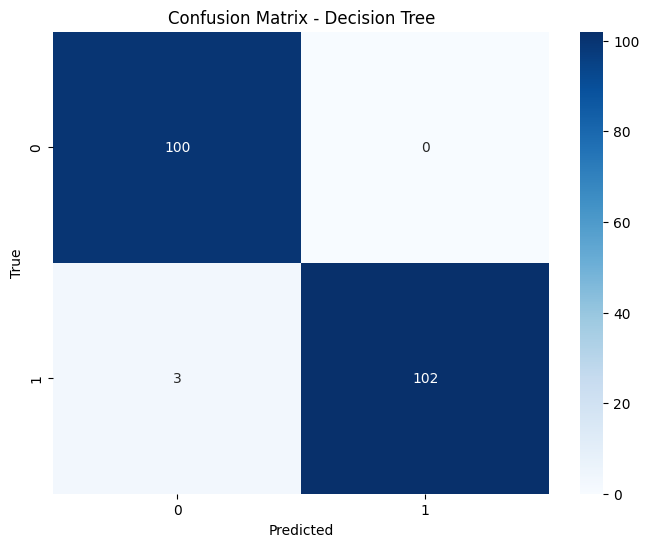

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


**Logistic Regression Performance:**
Accuracy: 0.8341463414634146
Precision: 0.7886178861788617
Recall: 0.9238095238095239
F1-score: 0.8508771929824561


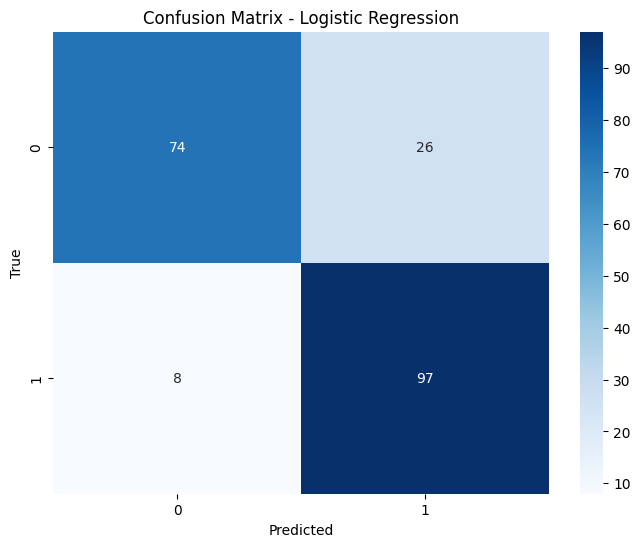


**Performance with PCA:**

**Random Forest (PCA) Performance:**
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


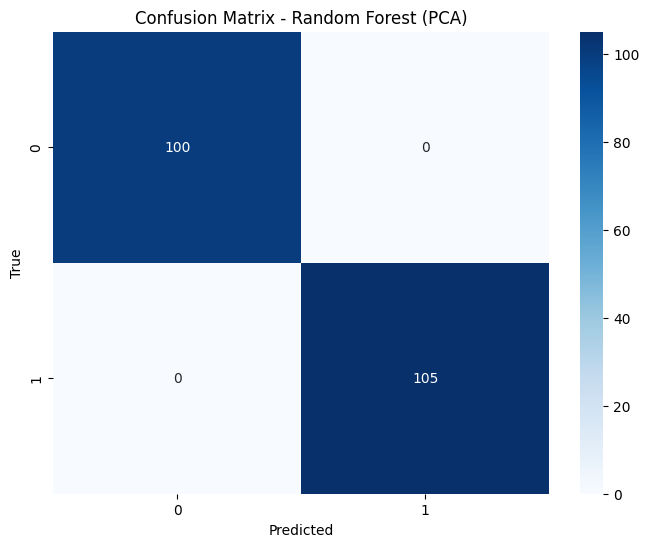


**AdaBoost (PCA) Performance:**
Accuracy: 0.8829268292682927
Precision: 0.8857142857142857
Recall: 0.8857142857142857
F1-score: 0.8857142857142857


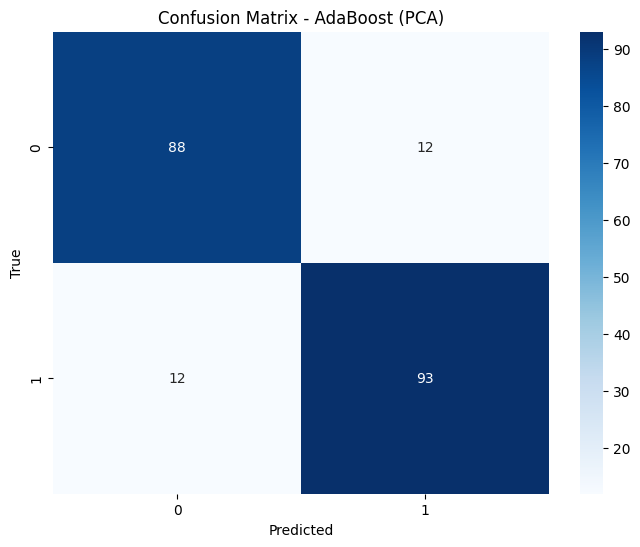


**Decision Tree (PCA) Performance:**
Accuracy: 0.9853658536585366
Precision: 1.0
Recall: 0.9714285714285714
F1-score: 0.9855072463768115


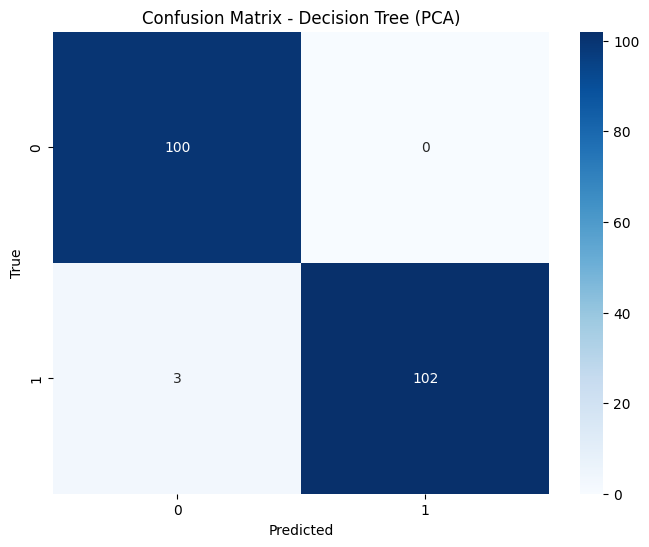

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



**Logistic Regression (PCA) Performance:**
Accuracy: 0.8341463414634146
Precision: 0.7886178861788617
Recall: 0.9238095238095239
F1-score: 0.8508771929824561


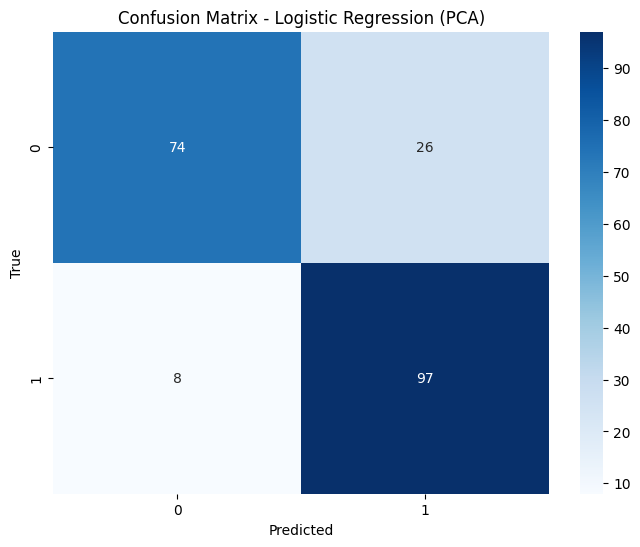

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the dataset (assuming 'heart.csv' is available)
data = pd.read_csv("/content/heart (1).csv")

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)


data.fillna(data.mean(), inplace=True)


X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def evaluate_model(model_name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print evaluation metrics
    print(f"\n**{model_name} Performance:**")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Train and evaluate multiple machine learning models
models = {
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression()
}

for model_name, model in models.items():
    evaluate_model(model_name, model.fit(X_train, y_train))

# Apply PCA (optional, adjust n_components based on explained variance)
pca = PCA(n_components=2)  # Adjust n_components as needed
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

# Evaluate models with PCA
print("\n**Performance with PCA:**")
for model_name, model in models.items():
    model.fit(X_pca_train, y_train)
    evaluate_model(f"{model_name} (PCA)", model)

plt.show()  # Display all plots after model evaluations
